In [2]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_root_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [3]:
data

['t_n55          5.7820 ( 5.3327,  6.7560) ( 5.2342,  6.5688)  1.3346 (Jnode 106)\n',
 't_n56          5.0021 ( 3.9010,  6.0434) ( 3.8841,  6.0204)  2.1363 (Jnode 105)\n',
 't_n57          4.6448 ( 3.6023,  5.6318) ( 3.5895,  5.6157)  2.0261 (Jnode 104)\n',
 't_n58          3.8112 ( 2.9005,  4.6861) ( 2.8960,  4.6783)  1.7823 (Jnode 103)\n',
 't_n59          3.6815 ( 2.8011,  4.5316) ( 2.8087,  4.5367)  1.7281 (Jnode 102)\n',
 't_n60          3.5045 ( 2.6626,  4.3226) ( 2.6500,  4.3040)  1.6539 (Jnode 101)\n',
 't_n61          3.2406 ( 2.4499,  4.0068) ( 2.4406,  3.9903)  1.5497 (Jnode 100)\n',
 't_n62          1.3861 ( 0.8485,  1.9884) ( 0.8286,  1.9627)  1.1341 (Jnode 99)\n',
 't_n63          2.2140 ( 1.6106,  2.8342) ( 1.6127,  2.8349)  1.2222 (Jnode 98)\n',
 't_n64          1.5639 ( 1.0988,  2.0649) ( 1.0697,  2.0327)  0.9630 (Jnode 97)\n',
 't_n65          1.3732 ( 0.9531,  1.8324) ( 0.9319,  1.8052)  0.8733 (Jnode 96)\n',
 't_n66          1.0581 ( 0.7249,  1.4398) ( 0.7095,  1.42

In [4]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [5]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [6]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [7]:
posterior_mean_iqtree

[5.782,
 5.0021,
 4.6448,
 3.8112,
 3.6815,
 3.5045,
 3.2406,
 1.3861,
 2.214,
 1.5639,
 1.3732,
 1.0581,
 0.7105,
 0.4711,
 0.2018,
 1.6333,
 3.5886,
 3.475,
 3.2294,
 2.2389,
 2.0013,
 1.7294,
 3.4581,
 3.2894,
 3.1777,
 2.9666,
 2.7107,
 2.6343,
 2.2764,
 2.0678,
 1.8913,
 1.4023,
 1.2934,
 2.2931,
 1.8393,
 3.3895,
 0.6878,
 3.3098,
 3.0858,
 2.7278,
 2.5278,
 1.8333,
 2.1108,
 2.6189,
 2.5237,
 2.3503,
 1.6824,
 2.2602,
 4.118,
 2.9127,
 1.7304,
 1.3362,
 4.3167]

In [8]:
lower_ci_iqtree

[]

In [9]:
upper_ci_iqtree

[]

In [10]:
file_LG = open("LG_G4_codeml_root_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [12]:
posterior_mean_baseml

[5.7188,
 5.5667,
 5.0832,
 4.2186,
 4.0408,
 3.8279,
 3.5116,
 1.6426,
 2.4792,
 1.7826,
 1.5518,
 1.2065,
 0.8283,
 0.5556,
 0.2245,
 1.8719,
 3.8822,
 3.4525,
 3.4913,
 2.5127,
 2.2025,
 2.011,
 3.8099,
 3.5784,
 3.4161,
 3.2076,
 2.9284,
 2.8091,
 2.4376,
 2.209,
 2.0031,
 1.5239,
 1.3545,
 2.4978,
 1.9948,
 3.7013,
 0.9326,
 3.5827,
 3.3162,
 2.9387,
 2.6872,
 1.9759,
 2.1969,
 2.8249,
 2.6625,
 2.3731,
 1.9192,
 2.4095,
 4.5358,
 3.4153,
 2.1653,
 1.7338,
 4.0553]

In [13]:
posterior_mean_iqtree

[5.782,
 5.0021,
 4.6448,
 3.8112,
 3.6815,
 3.5045,
 3.2406,
 1.3861,
 2.214,
 1.5639,
 1.3732,
 1.0581,
 0.7105,
 0.4711,
 0.2018,
 1.6333,
 3.5886,
 3.475,
 3.2294,
 2.2389,
 2.0013,
 1.7294,
 3.4581,
 3.2894,
 3.1777,
 2.9666,
 2.7107,
 2.6343,
 2.2764,
 2.0678,
 1.8913,
 1.4023,
 1.2934,
 2.2931,
 1.8393,
 3.3895,
 0.6878,
 3.3098,
 3.0858,
 2.7278,
 2.5278,
 1.8333,
 2.1108,
 2.6189,
 2.5237,
 2.3503,
 1.6824,
 2.2602,
 4.118,
 2.9127,
 1.7304,
 1.3362,
 4.3167]

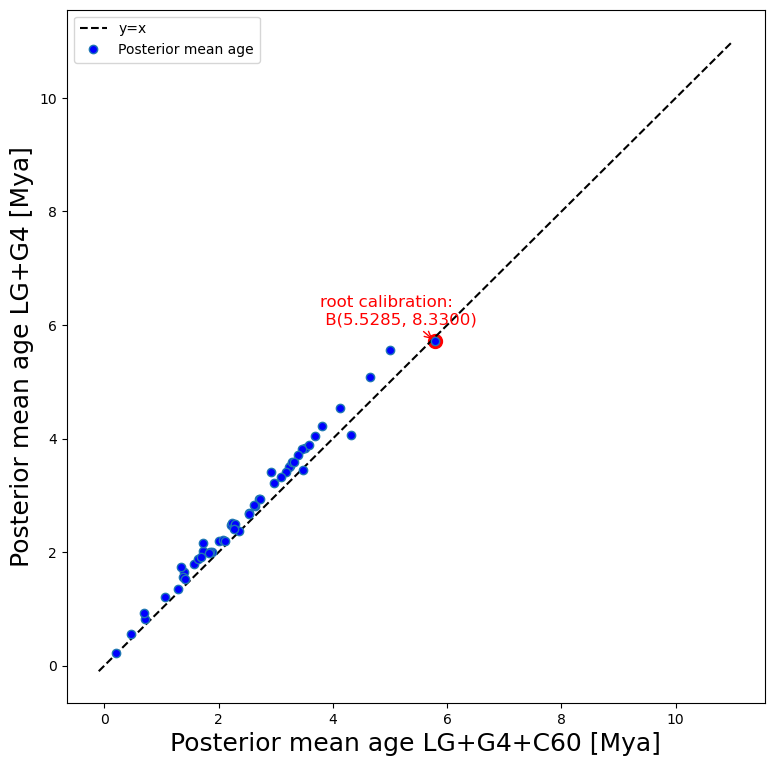

In [14]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,11], 
        [-0.1, 11], 
        'k--', label='y=x')
points = ax.plot(posterior_mean_iqtree, posterior_mean_baseml, 'o', label='Posterior mean age')

points[0].set_markerfacecolor('blue')
# points[23].set_markerfacecolor('blue')# Set default face color (for other points)

# Now plot the highlighted point with a different color
ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', s=100)
# ax.scatter(posterior_mean_iqtree[25], posterior_mean_baseml[25], color='red', s=100)
# ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', label='Root age')
ax.annotate('root calibration:\n B(5.5285, 8.3300)', 
        xy=(posterior_mean_iqtree[0], posterior_mean_baseml[0]), 
        xytext=(posterior_mean_iqtree[0] -2,  posterior_mean_baseml[0] + 0.3),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
# ax.annotate('middle calibration:\n B(5.2882,6.3610)', 
#         xy=(posterior_mean_iqtree[25], posterior_mean_baseml[25]), 
#         xytext=(posterior_mean_iqtree[25] -1.5,  posterior_mean_baseml[25] + 1.5),  # Offset position for the label
#         arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
#         fontsize=12, color='red') 
 
 
# Labels and title
ax.set_ylabel('Posterior mean age LG+G4 [Mya]', fontsize=18)
ax.set_xlabel('Posterior mean age LG+G4+C60 [Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG+G4 and LG+G4+C60 [t55 ~ B(5.5285, 8.3300)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_root_scatter.png')

In [15]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')